In [9]:
import os
from preprocess_nifti import *
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_aal
from nilearn.image import load_img
from brainextractor import BrainExtractor
from nilearn.plotting import view_img
from preprocess_nifti import *
import nibabel as nib

In [5]:
n3_dir = os.path.join('data', 'mri', 'ADNI', '136_S_1227', 'MPR____N3__Scaled')
files = find_nifti_files(n3_dir)
print(f'Found {len(files)} NIfTI files in {n3_dir}')

mni_path = os.path.join('mni', 'icbm152.nii')
mni_img = load_img(mni_path)
print(f'Loaded MNI template from {mni_path}')

aal = fetch_atlas_aal(version='3v2')
atlas_img = load_img(aal.maps)
print(f'Loaded AAL atlas from {aal.maps}')

for file in files:
    print('----------------------')
    print(f'\nProcessing file: {file}')
    registered_img = register_image_to_template(file, mni_img)
    roi_suvrs = compute_suvr(registered_img, atlas_img)
    for name, suv in roi_suvrs.items():
        print(f"  {name}: {suv}")
    print(f'Minimum SUVr: {min(roi_suvrs.values())}, Maximum SUVr: {max(roi_suvrs.values())}')
    print('----------------------')

Found 2 NIfTI files in data\mri\ADNI\136_S_1227\MPR____N3__Scaled
Loaded MNI template from mni\icbm152.nii


[fetch_atlas_aal] Dataset found in C:\Users\Dhruv Khanna\nilearn_data\aal_3v2

Loaded AAL atlas from C:\Users\Dhruv Khanna\nilearn_data\aal_3v2\AAL3\AAL3v1.nii
----------------------

Processing file: data\mri\ADNI\136_S_1227\MPR____N3__Scaled\2007-02-21_13_12_42.0\I66824\ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20070810000731580_S26837_I66824.nii


C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\preprocess_nifti.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = resample_to_img(img, mni_img, copy_header=True)
C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\preprocess_nifti.py:21: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  registered_img = resample_to_img(img, mni_img, copy_header=True)
C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\joblib\memory.py:326: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  return self.func(*args, **kwargs)
C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\preprocess_nifti.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_i

  0: 0.02515700219936244
  1: 0.01828010349235164
  2: 0.02698612958977693
  3: 0.03463220653766569
  4: 0.030085534980645666
  5: 0.02883461788839686
  6: 0.007153269663221178
  7: 0.00795208980987938
  8: 0.013641011702088361
  9: 0.017504225886482972
  10: 0.004080651512997271
  11: 0.006575018836658815
  12: 0.006175490016139224
  13: 0.007166514088435857
  14: 0.010917544860637696
  15: 0.018670246903284757
  16: 0.0011413341257273419
  17: 0.0018124121904873518
  18: 0.014182432665624084
  19: 0.01420682021488248
  20: 0.0028575240600850326
  21: 0.0020097412859923845
  22: 0.002037453340568452
  23: 0.00316348610848256
  24: 0.0013785734861649147
  25: 0.002155598235866375
  26: 0.000665254628923833
  27: 0.00323897379281484
  28: 0.0034498047192139092
  29: 0.0037159430514126534
  30: 0.0008954663394261349
  31: 0.0014713814742791471
  32: 0.008951620723895437
  33: 0.007773642637111829
  34: 0.010048643443734314
  37: 0.015266621161826642
  38: 0.0020800736532539175
  39: 0.00

C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\joblib\memory.py:326: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  return self.func(*args, **kwargs)


C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



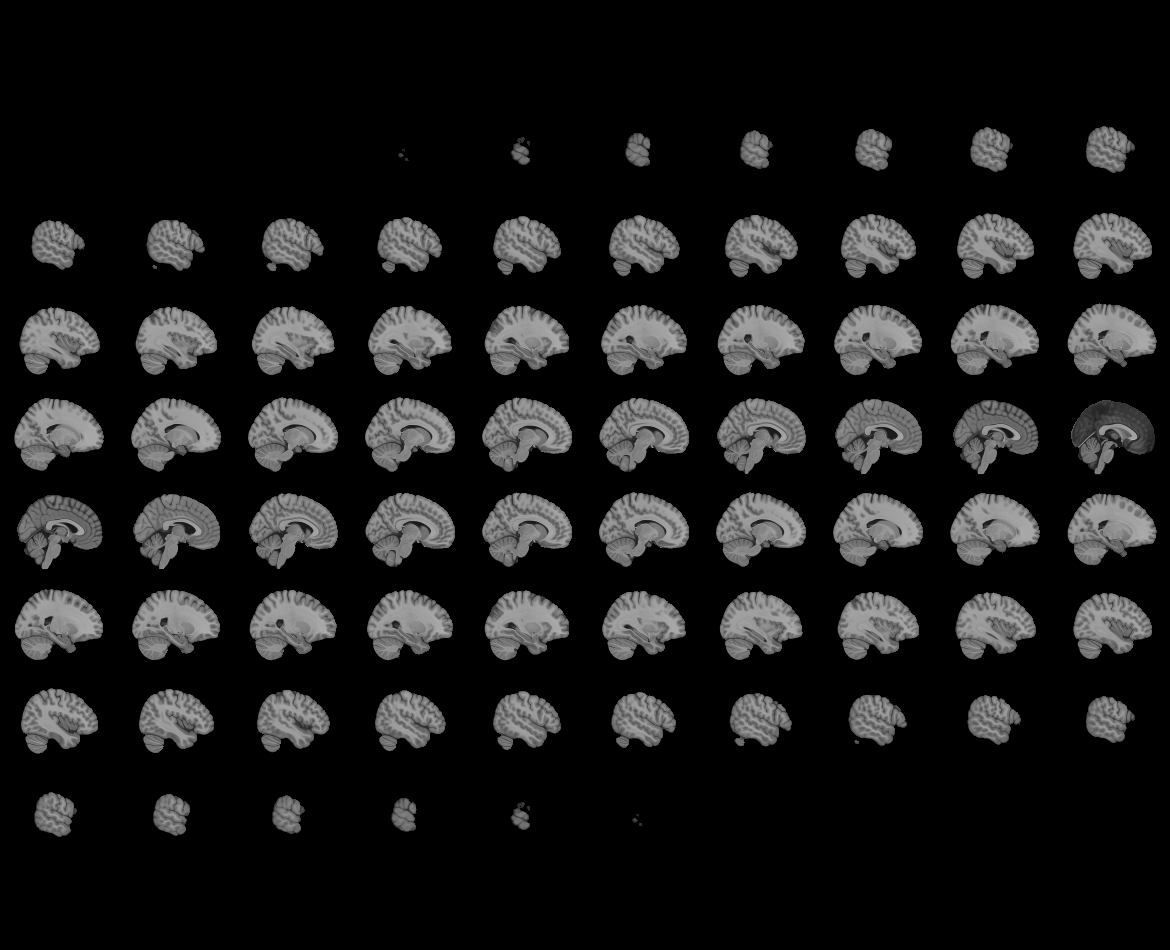
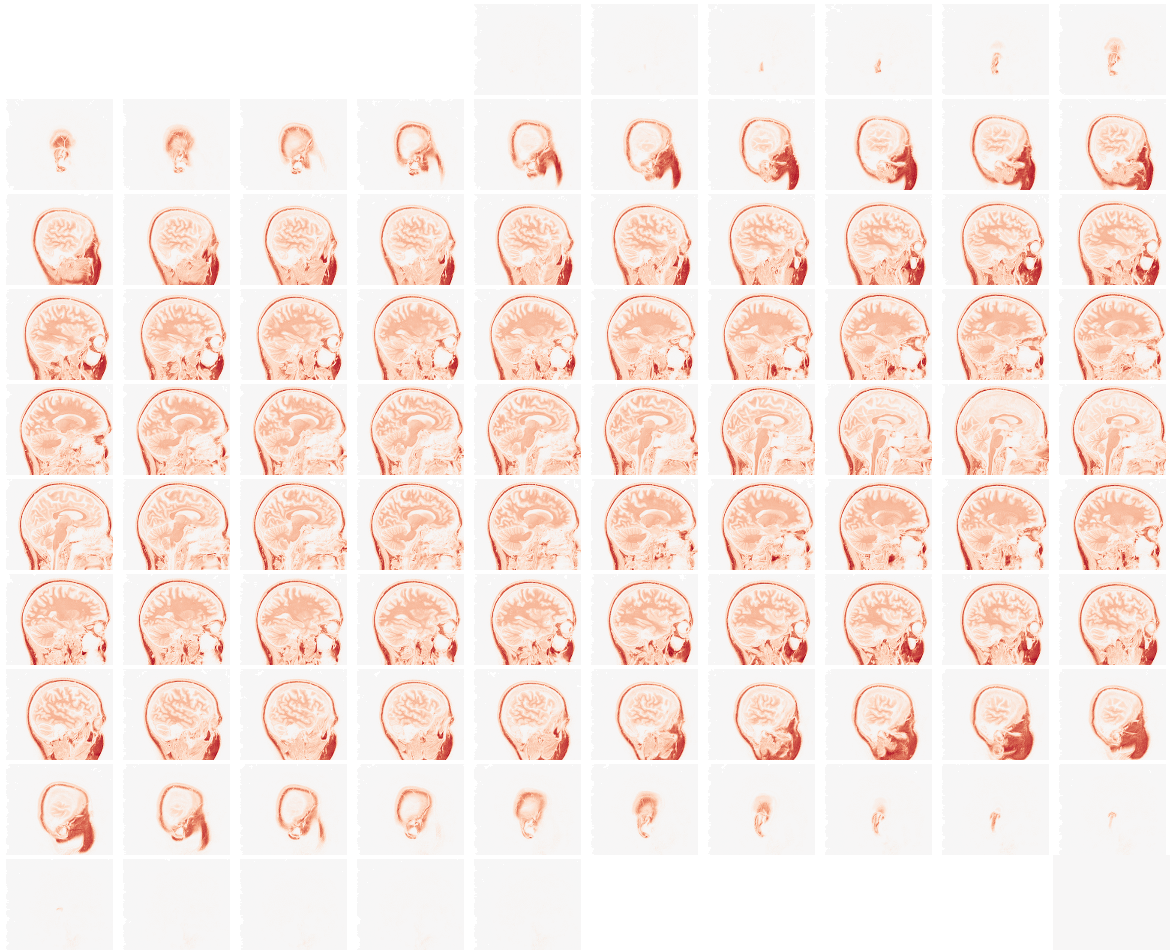

In [6]:
view_img(registered_img, title='Registered Image')

In [8]:
bet = BrainExtractor(img=registered_img)
bet.run()

Initializing...
Parameters: bt=0.500000, d1=20.000000, d2=10.000000, rmin=3.330000, rmax=10.000000
tmin: -39.029968, t2: -0.171748, t: 46.432438, t98: 465.870117, tmax: 803.865234
Center-of-Mass: [61.73106111 82.70761864 49.02847335]
Head Radius: 58.407549
Median within Head Radius: 149.426331
Initializing surface...
Brain extractor initialization complete!
Running surface deformation...
Iteration: 999
Complete.


C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_37292\1816954197.py:3: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  view_img(extracted_image, title='Extracted Brain Mask', bg_img = None)



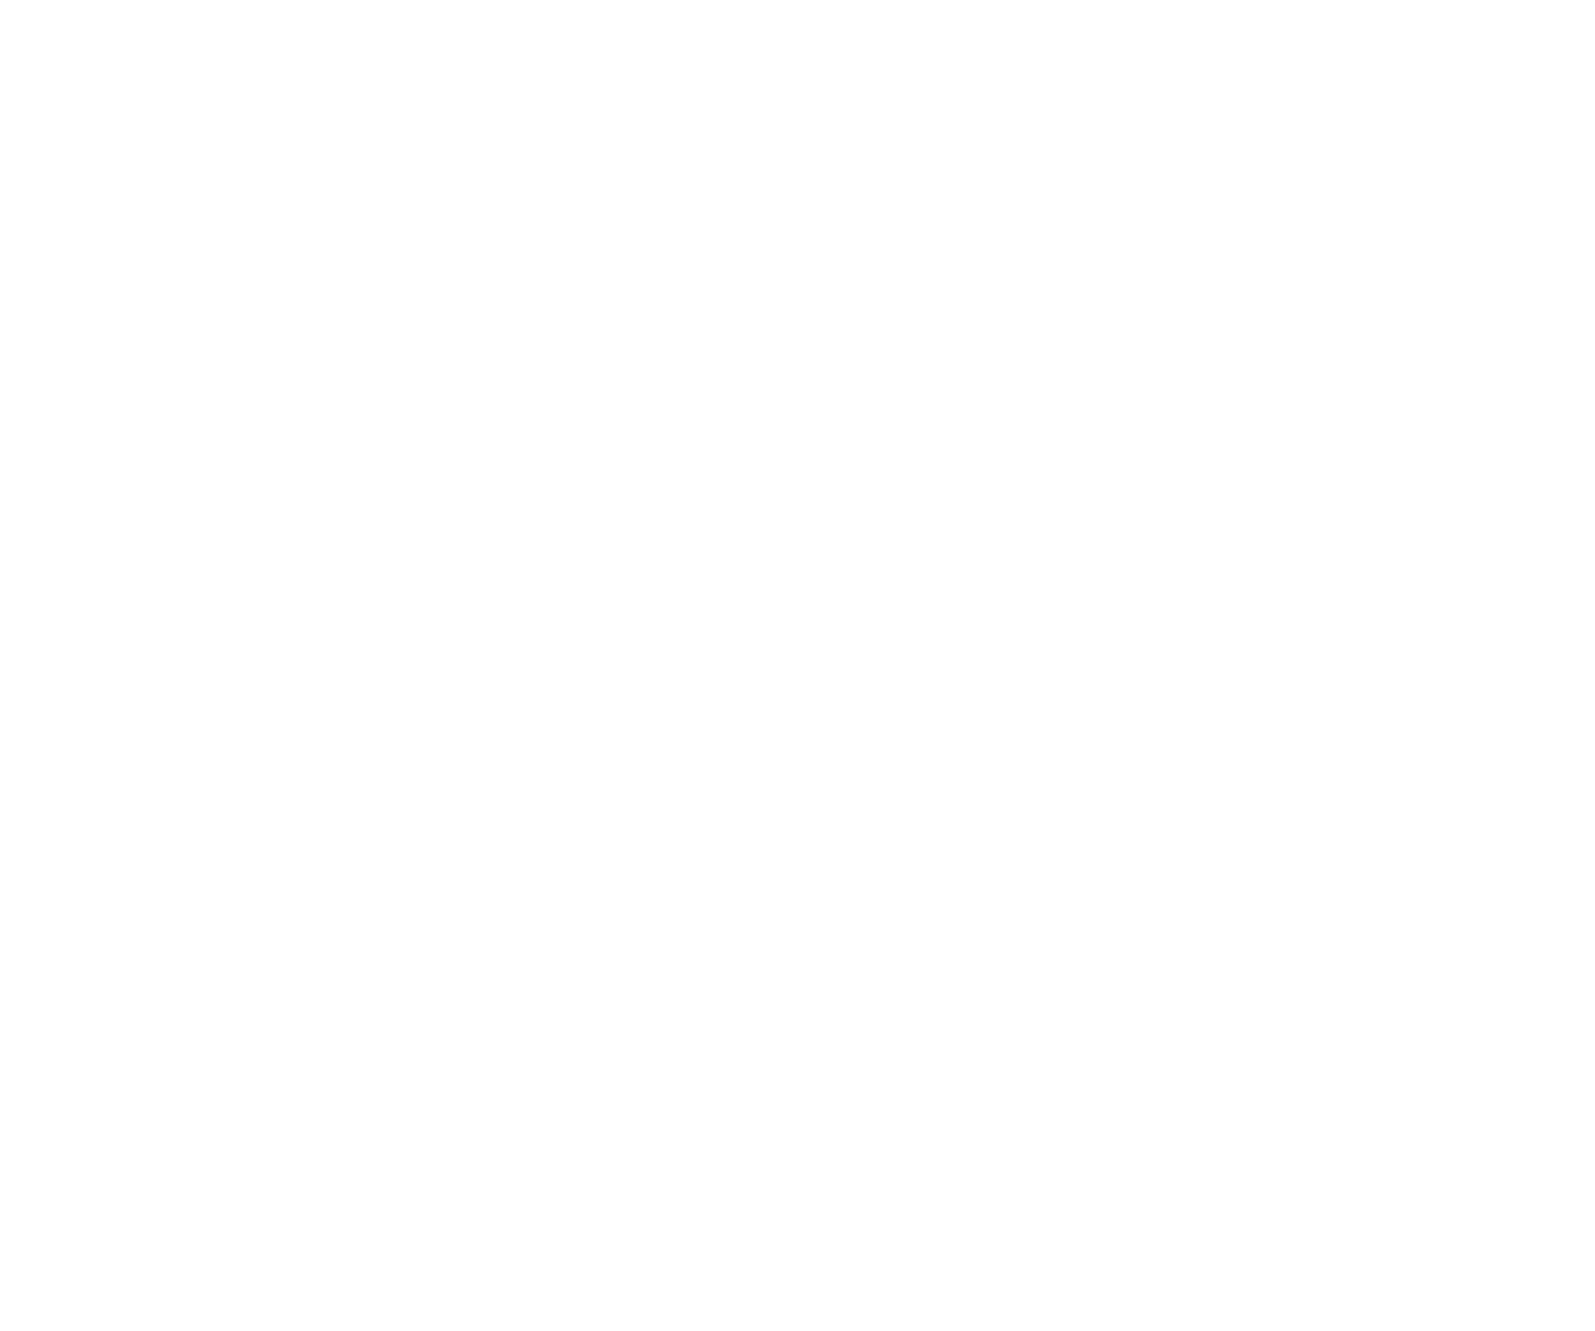
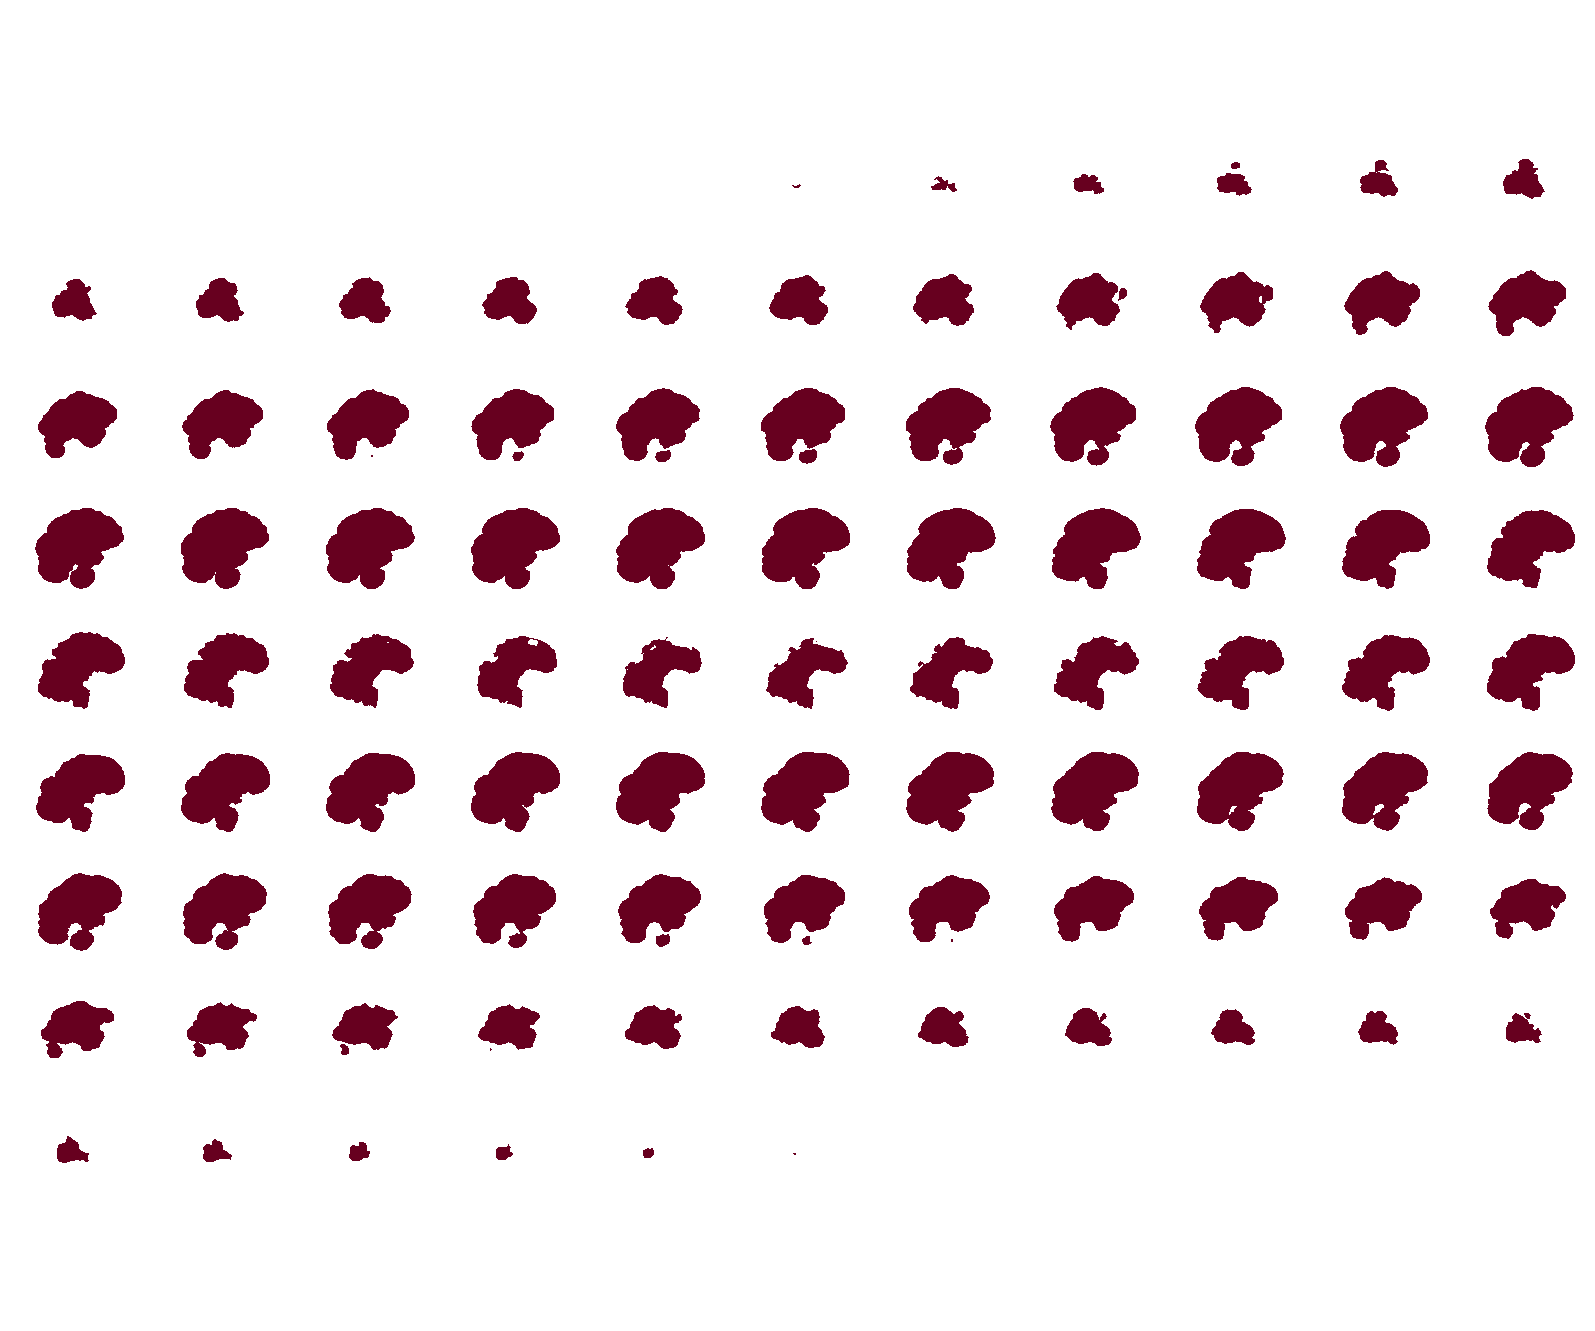

In [12]:
mask = bet.compute_mask()
extracted_image = nib.Nifti1Image(mask, bet.img.affine)
view_img(extracted_image, title='Extracted Brain Mask', bg_img = None)